In [118]:
%reset -f

# 1. ABOUT THE DATASET

**A The dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources.A total of 6704 data points were collected.The dataset included fivevariables: age, experience, job role, and education level and salary**

# 2. IMPORTING THE DATASET

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for visualization
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [120]:
salary_df = pd.read_csv('../data/Salary_Data.csv')

In [121]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# 3. DATA PREPROCESSING AND CLEANING

## 3.1. Initial Insight about the Dataset

In [122]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [123]:
salary_df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [124]:
salary_df.describe(include=object)

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


## 3.2. Discovering Columns

In [125]:
salary_df.columns.to_list()

['Age',
 'Gender',
 'Education Level',
 'Job Title',
 'Years of Experience',
 'Salary']

### 3.2.1. Column Description

| **Column**   | **Description**                                       |
| --------------------- | ----------------------------------------------------------- |
| `Age`                 | Age of the individual                                       |
| `Gender`              | Gender identity (e.g., Male, Female, Other)                 |
| `Education Level`     | Highest academic qualification (e.g., Bachelor’s, Master’s) |
| `Job Title`           | Current job position/title                                  |
| `Years of Experience` | Total work experience in years                              |
| `Salary`              | Annual salary in local currency                             |


### 3.2.2. Renaming the column names

In [126]:
salary_df.rename(columns={
    'Age' : 'age',
    'Education Level' : 'education_level',
    'Job Title' : 'job_title',
    'Years of Experience' : 'experience_years',
    'Salary' : 'salary'
}, inplace = True)

In [127]:
salary_df.columns.to_list()

['age', 'Gender', 'education_level', 'job_title', 'experience_years', 'salary']

### 3.2.3. Checking for value counts in each non-numerical columns

In [128]:
for col in salary_df.select_dtypes(include=object):
    print(salary_df[col].value_counts())
    print('\n')

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


education_level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


job_title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64




**The `education_level` contains the values like *Bachelor's* and *Bachelor's Degree* and *Master's* and *Master's Degree*.** </br>
**Also, there is one inconsistent entry for PhD.**

**However, the *Bachelor's* could indicate that the candidate is still persuing the degree and hasn't completed the degree and </br>
the *Bachelor's Degree* could indicate that the candidate has already got the degree.** <br>
**And the same goes for *Master's* and *Master's Degree* as well.**

**Or this could be the result of inconsistency during the data entry process.** <br>
**To verify, we shall check the average salary for each education levels.**

### 3.2.3.i) Checking mean salary for *Bachelor's* and *Bachelor's Degree*

In [129]:
salary_df[salary_df['education_level'] == "Master's"]['salary'].describe()

count       288.000000
mean     157604.166667
std       39864.267750
min       40000.000000
25%      130000.000000
50%      177500.000000
75%      195000.000000
max      200000.000000
Name: salary, dtype: float64

In [130]:
salary_df[salary_df['education_level'] == "Master's Degree"]['salary'].describe()

count      1572.000000
mean     125075.333969
std       38732.484980
min       32000.000000
25%      100000.000000
50%      122000.000000
75%      151670.000000
max      228000.000000
Name: salary, dtype: float64

### 3.2.3.ii) Checking mean salary for *Master's* and *Master's Degree*

In [131]:
salary_df[salary_df['education_level'] == "Master's"]['salary'].describe()

count       288.000000
mean     157604.166667
std       39864.267750
min       40000.000000
25%      130000.000000
50%      177500.000000
75%      195000.000000
max      200000.000000
Name: salary, dtype: float64

In [132]:
salary_df[salary_df['education_level'] == "Master's Degree"]['salary'].describe()

count      1572.000000
mean     125075.333969
std       38732.484980
min       32000.000000
25%      100000.000000
50%      122000.000000
75%      151670.000000
max      228000.000000
Name: salary, dtype: float64

- **We can see above in cell 30 and 31 that the average salary for *Bachelor* is more than *Bachelor's Degree* which indicates that *Bachelor* does not indicate the candidate is currently persuing the Bachelor.** <br>
- **From, above we can conclude that *Bachelor* and *Bachelor's Degree* are the same education level and the different labeling are the result of inconsistent data entry.** <br>

- **Same goes for the education levels *Masters* and *Master's Degree.*** <br>
- **So, we shall fix the inconsistency in the labeling below.**

In [133]:
salary_df['education_level'] = salary_df['education_level'].replace(
    {
        "Bachelor's" : "Bachelor's Degree",
        "Master's" : "Master's Degree",
        'phD' : 'PhD'
    }
)

In [134]:
#confirm the change
salary_df['education_level'].value_counts()

education_level
Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: count, dtype: int64

## 3.3. Missing Values

In [135]:
salary_df.isna().sum()

age                 2
Gender              2
education_level     3
job_title           2
experience_years    3
salary              5
dtype: int64

### 3.3.1. Dropping the rows with missing or null values

In [136]:
salary_df_cleaned = salary_df.dropna()

In [137]:
salary_df_cleaned.isna().sum()

age                 0
Gender              0
education_level     0
job_title           0
experience_years    0
salary              0
dtype: int64

## 3.4. Job Title Normalization

In [138]:
#unique job titles
unique_job_titles = salary_df_cleaned['job_title'].unique()
print(unique_job_titles)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [139]:
#job title mapping
job_title_correction = {
    "Juniour HR Generalist": "Junior HR Generalist",
    "Juniour HR Coordinator": "Junior HR Coordinator",
    "Back end Developer": "Backend Developer",
    "Front end Developer": "Frontend Developer",
    "Front End Developer": "Frontend Developer",
    "Software Engineer Manager": "Software Engineering Manager",
    "Social Media Man": "Social Media Manager", 
}

In [140]:
#replacing the job titles
salary_df_cleaned['job_title'] = salary_df_cleaned['job_title'].replace(job_title_correction)

In [141]:
#verify replacement
# Check if any inconsistent titles still exist
print(salary_df_cleaned[salary_df_cleaned['job_title'].isin(job_title_correction.keys())])


Empty DataFrame
Columns: [age, Gender, education_level, job_title, experience_years, salary]
Index: []


## 3.4. Outliers

### 3.4.1. Visualizing Outliers in Numerical Columns Using Boxplot 

In [142]:
numerical_cols = salary_df_cleaned.select_dtypes(exclude=object).columns.to_list()

In [143]:
numerical_cols

['age', 'experience_years', 'salary']

In [144]:
#method to visualize the outliers using boxplot
def visualize_outliers_boxplot(col, df):
    plt.figure(figsize=(6, 3))
    plt.boxplot(x=df[col], orientation='horizontal')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')
    plt.show()

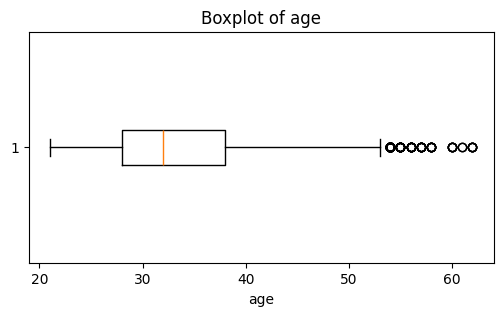

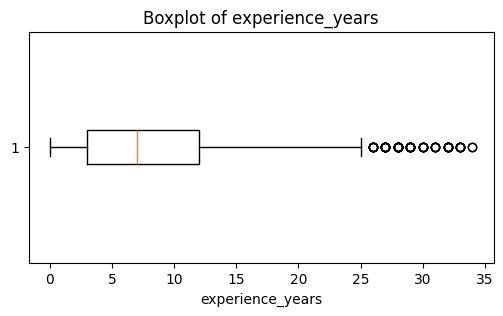

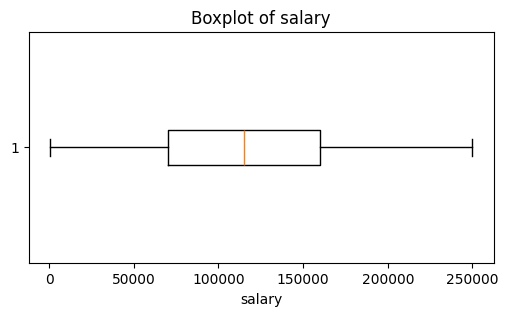

In [145]:
for col in numerical_cols:
    visualize_outliers_boxplot(col, salary_df_cleaned)

- **We can see above that the columns `age` and `experience_years` contain outliers while the column `salary` does not contain outliers.**


### 3.4.2. Detecting the outliers using IQR method

In [146]:
#method to detect the outliers usin IQR method
def detect_outliers_iqr(col, df):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

In [147]:
for col in numerical_cols:
    outliers = detect_outliers_iqr(col, salary_df_cleaned)
    print(f'Outliers in the column {col}: ')
    display(outliers)
    print(f'Number of rows containing outlier values: {len(outliers)}')
    print('\n')

Outliers in the column age: 


,age,Gender,education_level,job_title,experience_years,salary
1211,61.0,Male,PhD,Software Engineering Manager,20.0,200000.0
1223,57.0,Male,PhD,Software Engineering Manager,18.0,195000.0
1225,62.0,Male,PhD,Software Engineering Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineering Manager,20.0,200000.0
1240,55.0,Male,PhD,Software Engineering Manager,17.0,190000.0
...,...,...,...,...,...,...
3058,54.0,Male,Master's Degree,Senior Software Engineer,32.0,195270.0
3067,54.0,Male,Bachelor's Degree,Full Stack Engineer,25.0,179756.0
3084,54.0,Female,PhD,Software Engineering Manager,32.0,191510.0
3104,54.0,Male,PhD,Software Engineering Manager,30.0,184660.0


Number of rows containing outlier values: 123


Outliers in the column experience_years: 


,age,Gender,education_level,job_title,experience_years,salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0
2392,52.0,Female,Master's Degree,Senior Software Engineer,28.0,186963.0
2396,60.0,Female,PhD,Software Engineering Manager,33.0,179180.0
2398,58.0,Male,Master's Degree,Senior Software Engineer,27.0,190004.0
...,...,...,...,...,...,...
3076,52.0,Male,PhD,Software Engineering Manager,26.0,185982.0
3084,54.0,Female,PhD,Software Engineering Manager,32.0,191510.0
3104,54.0,Male,PhD,Software Engineering Manager,30.0,184660.0
3120,54.0,Male,PhD,Software Engineering Manager,28.0,182013.0


Number of rows containing outlier values: 75


Outliers in the column salary: 


,age,Gender,education_level,job_title,experience_years,salary


Number of rows containing outlier values: 0




In [148]:
# #function to remove outliers
# def remove_outliers(col, df=salary_df_cleaned):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     df = df[(df[col] > lower) & (df[col] < upper)]
#     return df

In [149]:
# for col in numerical_cols:
#     salary_df_cleaned = remove_outliers(col, salary_df_cleaned)    

### 3.4.3. Capping the outliers (Winsorization)

In [150]:
def cap_outliers(col, df=salary_df_cleaned):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df.loc[:, col] = df[col].clip(lower, upper)
    return df

In [151]:
#capping all numeric columns
for col in numerical_cols:
    salary_df_cleaned = cap_outliers(col)

### 3.4.4. Verifying that the outliers is handled

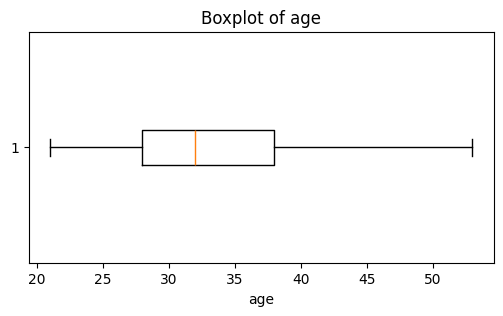

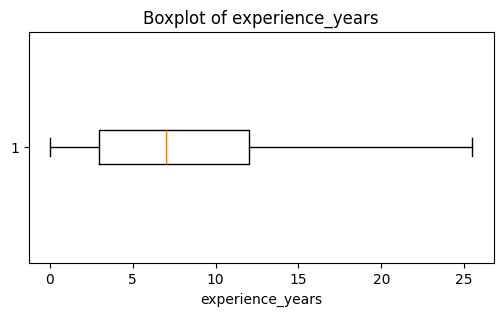

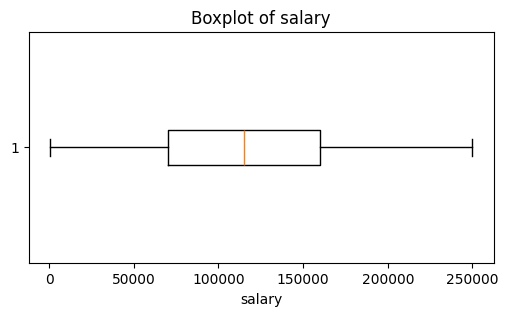

In [152]:
for col in numerical_cols:
    visualize_outliers_boxplot(col, salary_df_cleaned)

- **We can see above in the boxplots that outliers have been handled.**

### 3.4.5. Extreme Low Values in Salary

In [153]:
salary_extreme_lows = salary_df_cleaned[salary_df_cleaned['salary'] < 1000]
salary_extreme_lows

,age,Gender,education_level,job_title,experience_years,salary
259,29.0,Male,Bachelor's Degree,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Frontend Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineering Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


**We, can observe above that there are some extreme low salaries.** <br>
**They're likely data entry errors or unrealistic for the job roles (e.g., Software Engineer Manager with 579 salary).**

In [154]:
salary_df_cleaned = salary_df_cleaned[salary_df_cleaned['salary'] >= 1000]

In [155]:
for col in numerical_cols:
    outliers_after_capping = detect_outliers_iqr(col, salary_df_cleaned)
    print(f'Outliers in the column {col}: ')
    display(outliers)
    print(f'Number of rows containing outlier values: {len(outliers)}')
    print('\n')


Outliers in the column age: 


,age,Gender,education_level,job_title,experience_years,salary


Number of rows containing outlier values: 0


Outliers in the column experience_years: 


,age,Gender,education_level,job_title,experience_years,salary


Number of rows containing outlier values: 0


Outliers in the column salary: 


,age,Gender,education_level,job_title,experience_years,salary


Number of rows containing outlier values: 0




- **The outlers are handled successfully.**

### 3.4.5. Saving the cleaned dataset

In [156]:
salary_df_cleaned.to_csv('../data/cleaned_salary_data.csv', index=False)

# 4. EXPLORATORY DATA ANALYSIS (EDA)

## 4.1. Basic Information

In [157]:
shape = salary_df_cleaned.shape
print(f'rows: {shape[0]}')
print(f'columns : {shape[1]}')

rows: 6694
columns : 6


In [158]:
salary_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               6694 non-null   float64
 1   Gender            6694 non-null   object 
 2   education_level   6694 non-null   object 
 3   job_title         6694 non-null   object 
 4   experience_years  6694 non-null   float64
 5   salary            6694 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.1+ KB


In [159]:
salary_df_cleaned.describe().round(2)

,age,experience_years,salary
count,6694.00,6694.00,6694.00
mean,33.58,8.06,115397.87
std,7.49,5.92,52730.84
min,21.00,0.00,25000.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,53.00,25.50,250000.00


In [160]:
salary_df_cleaned.describe(include=object)

,Gender,education_level,job_title
count,6694,6694,6694
unique,3,4,187
top,Male,Bachelor's Degree,Software Engineer
freq,3669,3018,518


## 4.2. Univariate Analysis of Numerical Data

### 4.2.1. Distribution of Numerical Data

In [161]:
display(numerical_cols)

['age', 'experience_years', 'salary']

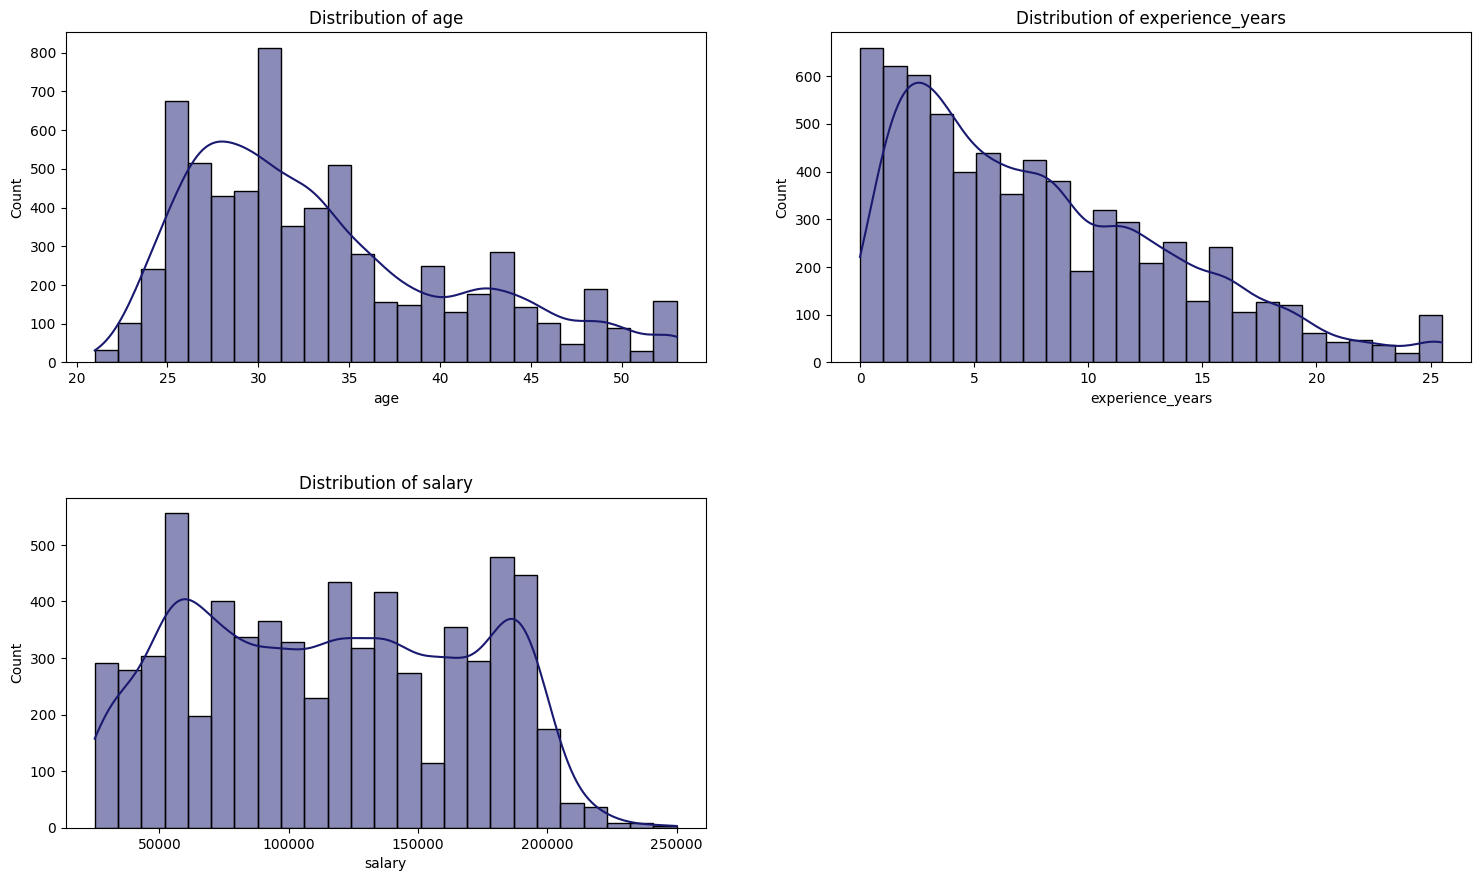

In [162]:
plt.figure(figsize=(16,10))

for index, col in enumerate(numerical_cols):
    plt.subplot(2,2, index + 1)
    sns.histplot(salary_df_cleaned[col], kde=True, bins=25, color='midnightblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout(pad=5)
plt.show()

### 📊 Univariate Analysis: Numerical Features

We analyzed the distributions of the key numerical variables in the dataset: **Age**, **Years of Experience**, and **Salary**.

#### 🔹 Age
- The distribution of age is **right-skewed**, indicating that most employees are relatively younger.
- A small number of older individuals create a long tail on the right side.
- This skewness may influence modeling and can be normalized if required.

#### 🔹 Years of Experience
- Similar to age, **years of experience** is also **right-skewed**.
- This suggests that a majority of employees are early in their careers, with a few having significantly higher experience levels.

#### 🔹 Salary
- The salary distribution is **multimodal**, with multiple peaks.
- This indicates the presence of **distinct salary groups**, potentially based on different job titles, education levels, or industries.
- This insight highlights the importance of including **categorical variables** in the predictive model to account for these clusters.

---

### ✅ Summary
The data shows meaningful patterns in the numerical features. Age and experience are skewed, which is typical in employment datasets. The multimodal nature of salary suggests complex relationships that a linear regression model will need help from other features (like job title and education level) to learn effectively.
 

### 4.2.2. Basic Statistics of Numerical Features

In [163]:
for col in numerical_cols:
    print(f'Basic Statistics of {col}:')
    stat = salary_df_cleaned[col].describe().round(2).to_frame().T
    display(stat)
    print('\n')

Basic Statistics of age:


,count,mean,std,min,25%,50%,75%,max
age,6694.0,33.58,7.49,21.0,28.0,32.0,38.0,53.0




Basic Statistics of experience_years:


,count,mean,std,min,25%,50%,75%,max
experience_years,6694.0,8.06,5.92,0.0,3.0,7.0,12.0,25.5




Basic Statistics of salary:


,count,mean,std,min,25%,50%,75%,max
salary,6694.0,115397.87,52730.84,25000.0,70000.0,115000.0,160000.0,250000.0


## 4.3. Univariate Analysis of Categorical Columns

In [164]:
categorical_cols = salary_df_cleaned.select_dtypes(include=object).columns.to_list()

In [165]:
categorical_cols

['Gender', 'education_level', 'job_title']

### 4.3.1. Gender

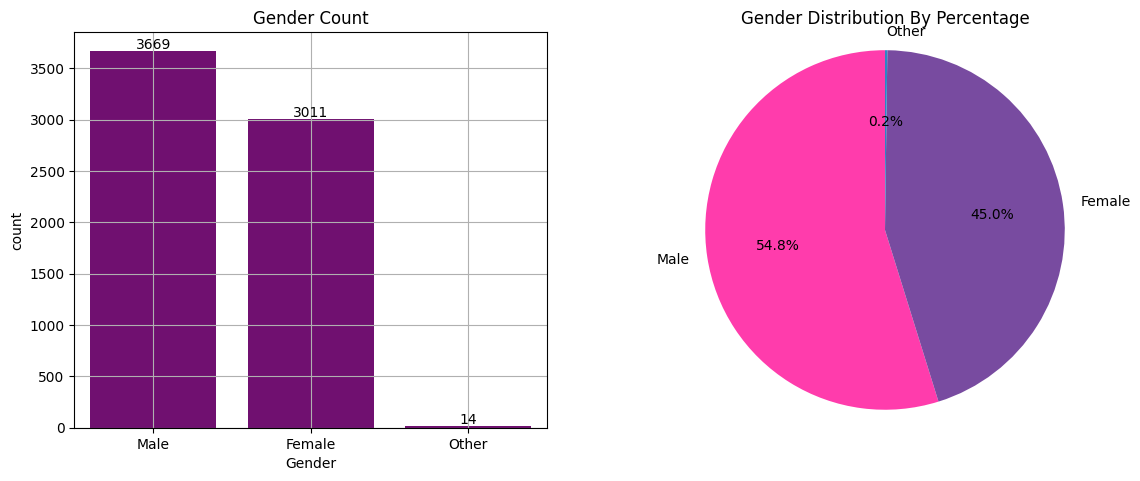

In [166]:
gender_count = salary_df_cleaned['Gender'].value_counts()

plt.figure(figsize=(13,6))

plt.subplot(1, 2, 1)
sns.countplot(x=salary_df_cleaned['Gender'], color='purple')
plt.grid(True)
plt.title(f'Gender Count')
for i, count in enumerate(gender_count):
    plt.text(i, count + 20, str(count), ha='center')

plt.subplot(1, 2, 2)
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['#FF3CAC', '#784BA0', '#2B86C5'])
plt.title('Gender Distribution By Percentage')
plt.axis('equal')

plt.tight_layout(pad=5)
plt.show()

### 4.3.2 Education Level

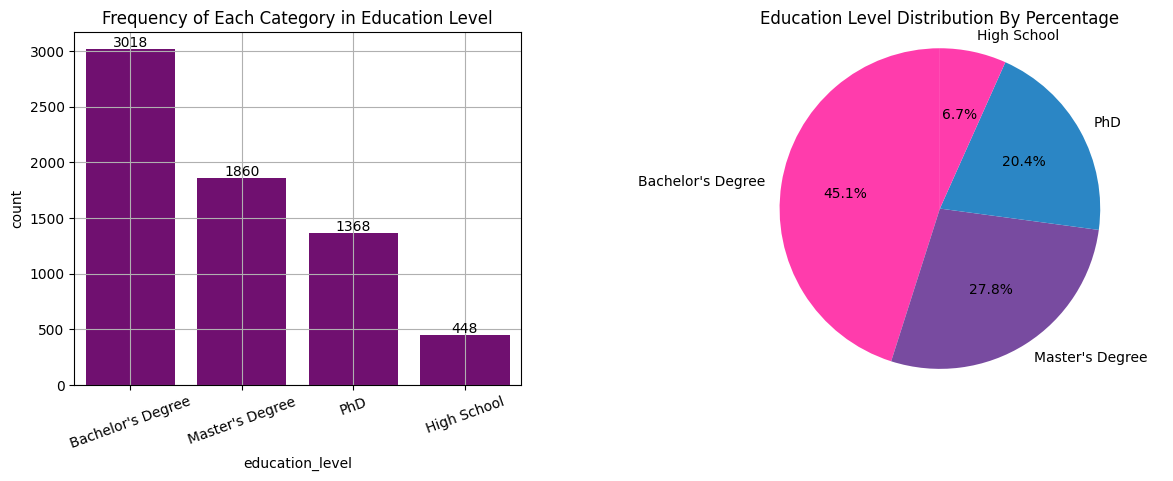

In [167]:
education_levels = salary_df_cleaned['education_level'].value_counts()

plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=salary_df_cleaned['education_level'], color='purple')
plt.grid(True)
plt.title(f'Frequency of Each Category in Education Level')
plt.xticks(rotation=20)
for i, count in enumerate(education_levels):
    plt.text(i, count + 20, str(count), ha='center')

plt.subplot(1, 2, 2)
plt.pie(education_levels, labels=education_levels.index, autopct='%1.1f%%', startangle=90, colors=['#FF3CAC', '#784BA0', '#2B86C5'])
plt.title('Education Level Distribution By Percentage')
plt.axis('equal')

plt.tight_layout(pad=5)
plt.show()

### 4.3.3. Job Titles

#### 4.3.1.1. Top 20 Most Freqeunt and Least Frequent Job Titles

In [168]:
most_frequent_jobs = salary_df_cleaned['job_title'].value_counts().head(20)
least_frequent_jobs = salary_df_cleaned['job_title'].value_counts().tail(20)

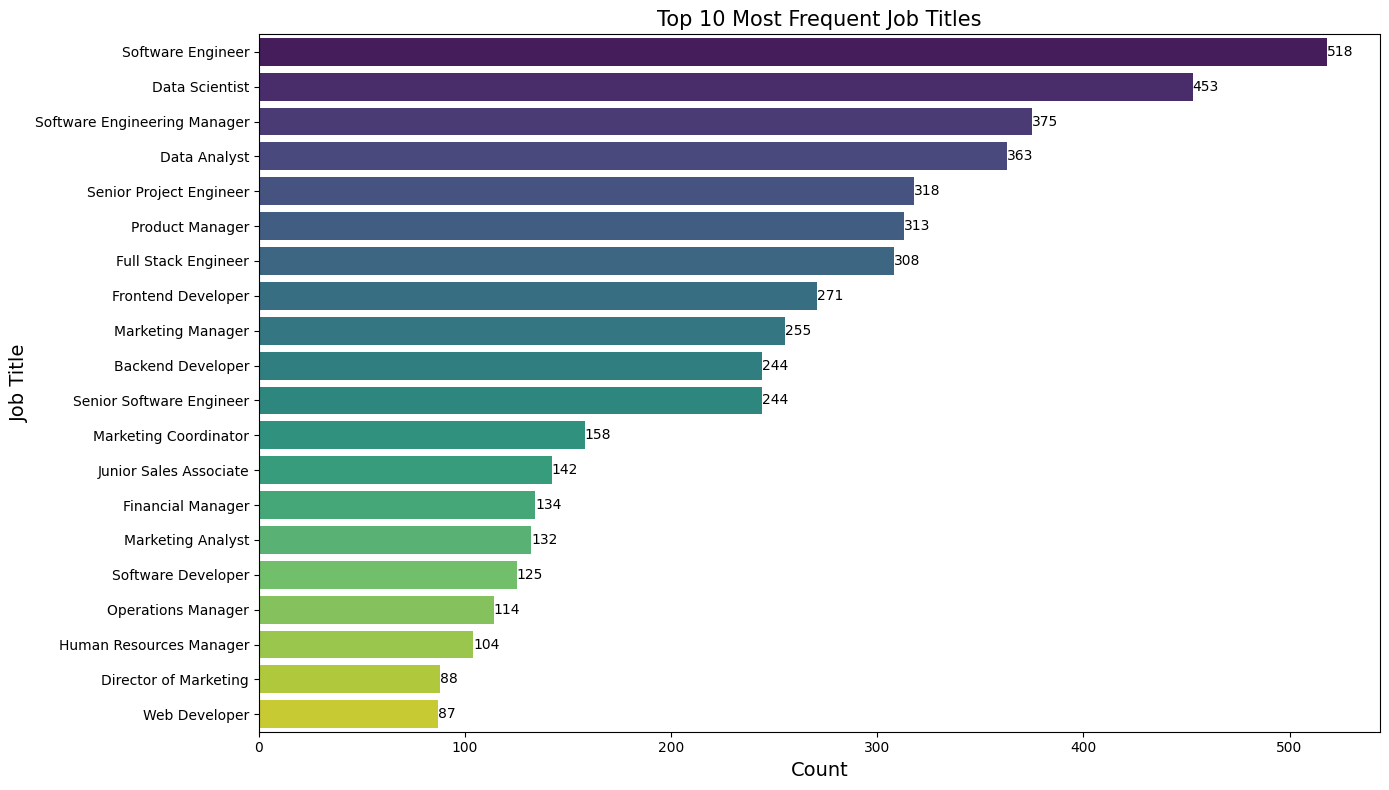

In [169]:
# Plotting Most Frequent Job Titles
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=salary_df_cleaned, y='job_title', order=most_frequent_jobs.index, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Top 10 Most Frequent Job Titles', fontsize=15)
plt.ylabel('Job Title', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

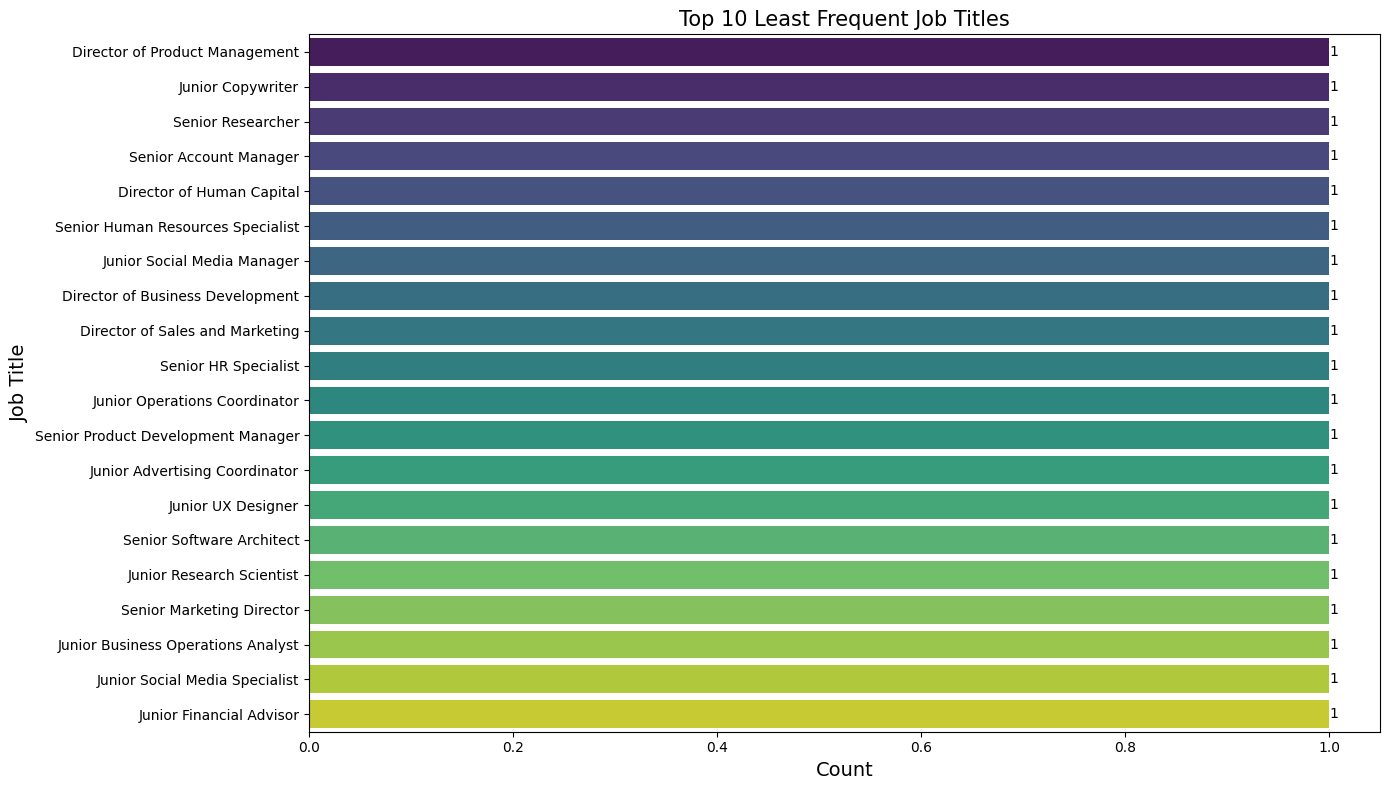

In [170]:
# Plotting Least Frequent Job Titles
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=salary_df_cleaned, y='job_title', order=least_frequent_jobs.index, palette='viridis')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Top 10 Least Frequent Job Titles', fontsize=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.tight_layout()
plt.show()

In [171]:
salary_df_cleaned['job_title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## 4.4. Relationship between Features

### 4.4.1. Gender V/S Salary

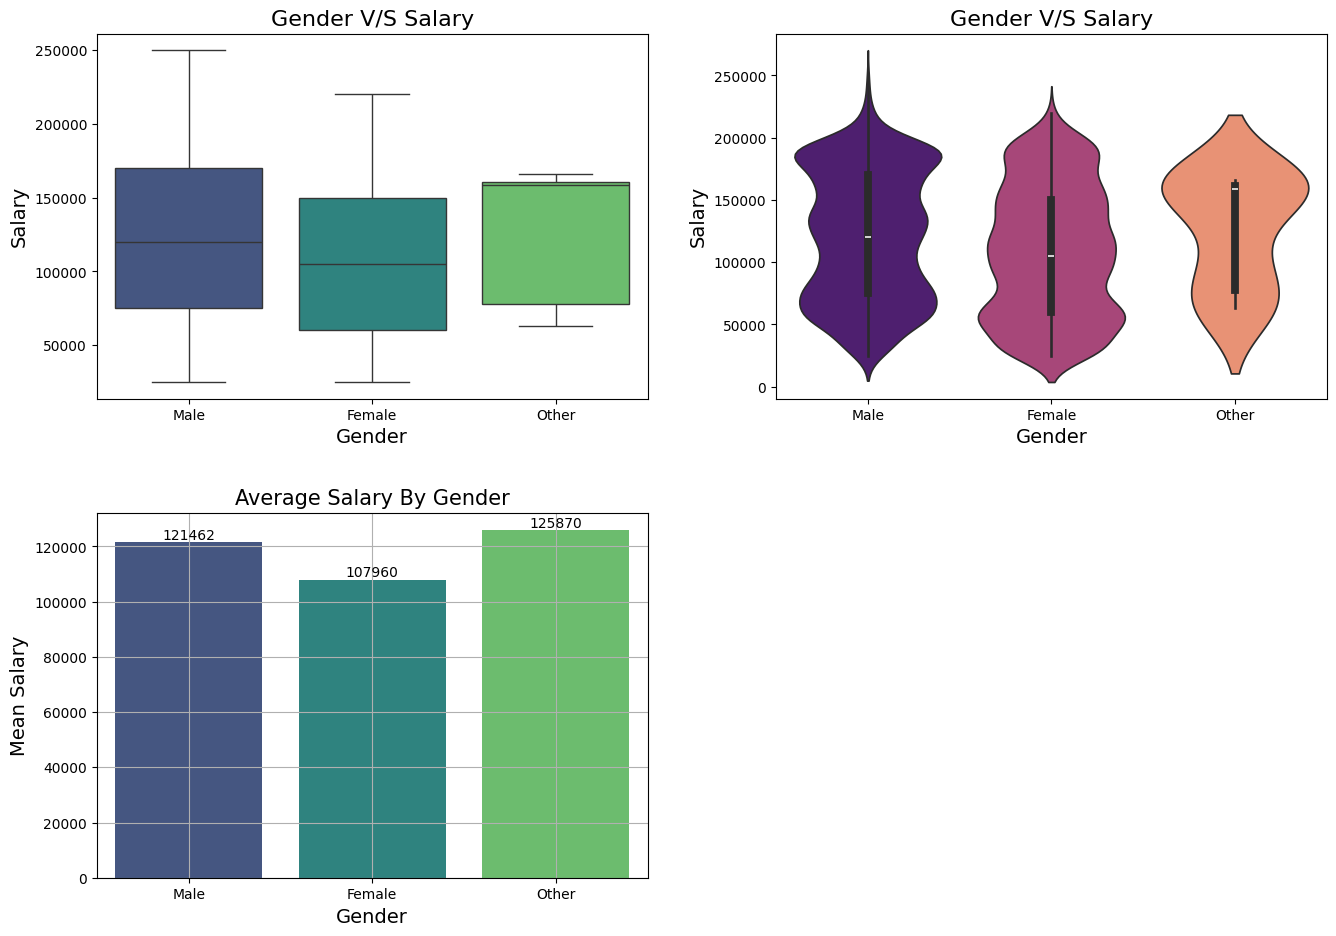

In [172]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=salary_df_cleaned, x='Gender', y='salary', palette='viridis')
plt.title('Gender V/S Salary', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.subplot(2, 2, 2)
sns.violinplot(data=salary_df_cleaned, x='Gender', y='salary', palette='magma')
plt.title('Gender V/S Salary', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.subplot(2, 2, 3)
ax = sns.barplot(data=salary_df_cleaned, x='Gender', y='salary', estimator='mean', ci=None, palette='viridis')
plt.title(f'Average Salary By Gender', fontsize=15)
plt.xlabel(f'Gender', fontsize=14)
plt.ylabel(f'Mean Salary', fontsize=14)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout(pad=3)
plt.grid(True)
plt.show()

### 📊 Salary Distribution by Gender – Boxplot Analysis

- The **salary variation** is fairly **similar across all gender categories**, with no drastic differences in spread.
- The **median salary** is:
  - Highest for **"Other"**
  - Followed by **Male**
  - Lowest for **Female**
- **Box position**:
  - For **Male** and **Female**, the median is approximately in the **center of the box**, indicating a relatively symmetric distribution.
  - For **"Other"**, the median is closer to the **upper quartile (Q3)**, suggesting a **left-skewed distribution**.
- **Whisker lengths**:
  - **Male** have the **longest whiskers**, showing a wider salary range.
  - **Female** have slightly shorter whiskers (~85% of male's), with similar box width.
  - **"Other"** have the **shortest whiskers** and a box closer to the upper range, suggesting compact and higher salaries.
- There are **no outliers** detected in any gender category.
- Overall, while "Other" show slightly higher medians, the data does **not indicate strong gender-based salary disparities** based solely on the boxplot.

### 4.4.2. Education Level and Salary

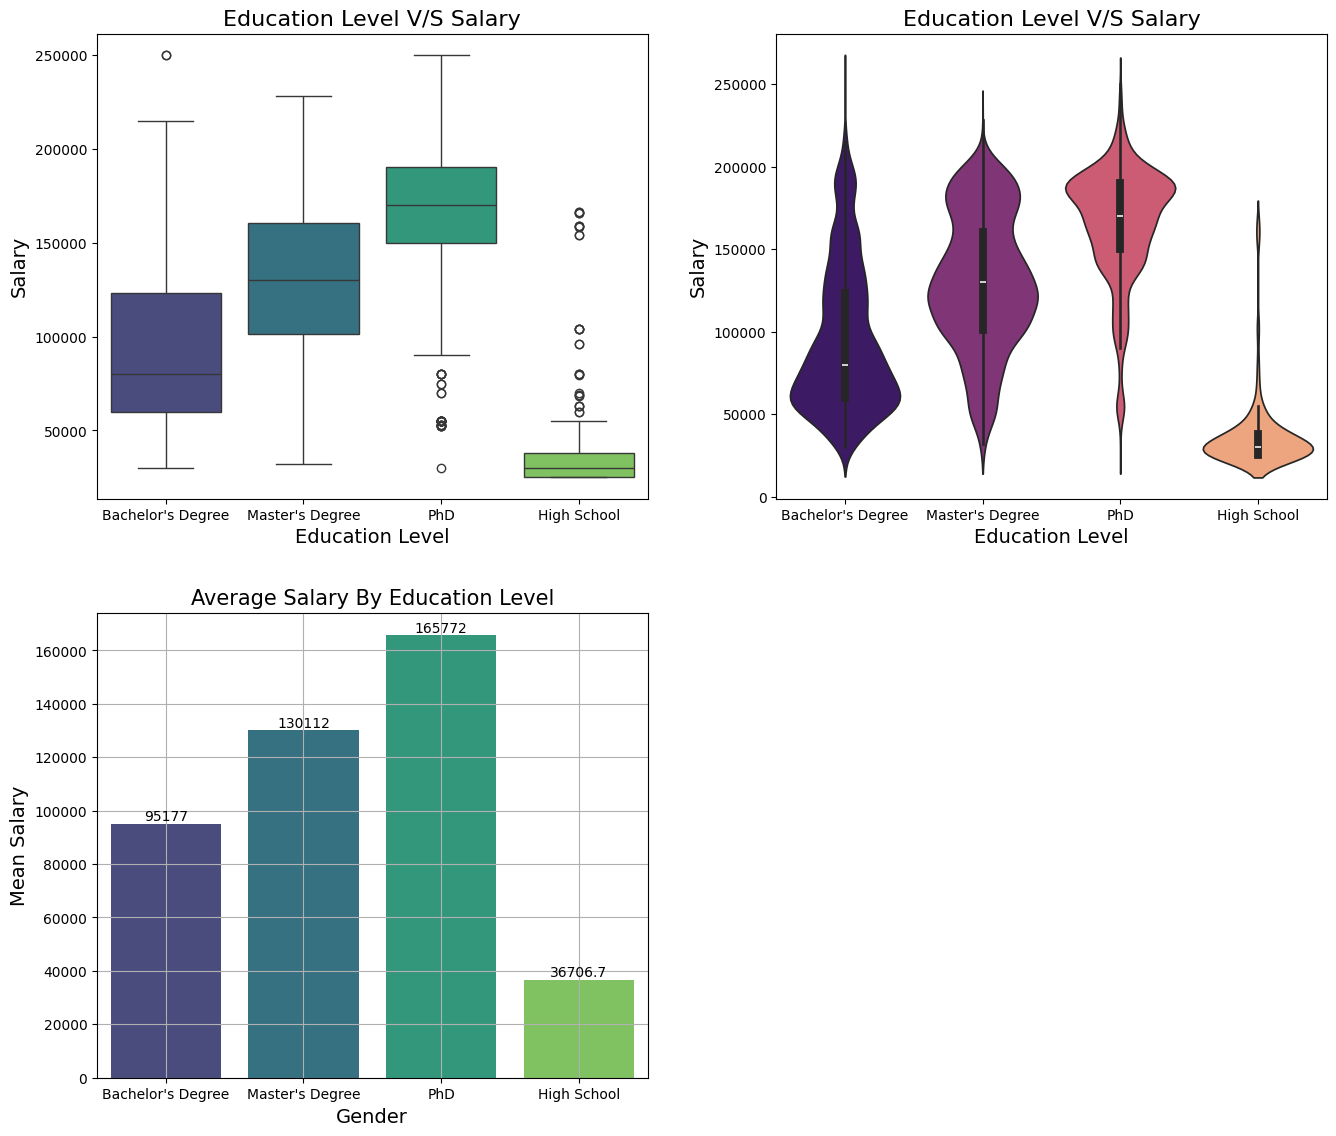

In [173]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
sns.boxplot(data=salary_df_cleaned, x='education_level', y='salary', palette='viridis')
plt.title('Education Level V/S Salary', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.subplot(2, 2, 2)
sns.violinplot(data=salary_df_cleaned, x='education_level', y='salary', palette='magma')
plt.title('Education Level V/S Salary', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Salary', fontsize=14)

plt.subplot(2, 2, 3)
ax = sns.barplot(data=salary_df_cleaned, x='education_level', y='salary', estimator='mean', ci=None, palette='viridis')
plt.title(f'Average Salary By Education Level', fontsize=15)
plt.xlabel(f'Gender', fontsize=14)
plt.ylabel(f'Mean Salary', fontsize=14)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout(pad=3)
plt.grid(True)
plt.show()

### 🎓 Salary Distribution by Education Level – Boxplot Analysis

- **PhD**:
  - Exhibits **high median salary**, indicating top earnings among all education levels.
  - **Narrow IQR (Interquartile Range)** suggests salaries are more **concentrated**, with **less variation**.
  - **Outliers on the lower end**, indicating that some PhD holders earn **significantly lower salaries** compared to the rest, possibly due to certain industries or roles with lower pay scales.

- **Master's Degree**:
  - Shows **no outliers**, indicating that the salaries for this group are **more consistent** and follow a more predictable distribution.
  - **Moderate IQR** shows some variability, but salaries are relatively centralized.

- **Bachelor's Degree**:
  - **Wide IQR**, reflecting a broader salary range and greater variability.
  - **One outlier on the higher end**, indicating a few individuals earn much higher salaries than the majority, possibly due to specialized roles or exceptional performance.

- **High School**:
  - Has the **lowest median salary**, indicating entry-level or lower-wage roles.
  - **Narrow IQR**, suggesting less salary variability within the group.
  - **Outliers on the higher end**, meaning there are some high-paying jobs held by individuals with just a high school education, possibly due to exceptional roles or promotions.

---

📌 **Key Insight**:  
While **higher education** generally correlates with **higher salaries**, the salary distribution is more consistent for **Master's degree holders**. **PhD** holders show outliers on the lower end, possibly due to niche roles, while **Bachelor's degree holders** have one high-end outlier. **High school** education shows few lower-paying roles but some exceptions with higher-paying jobs at the upper end.



### 4.4.3. Experience and Salary

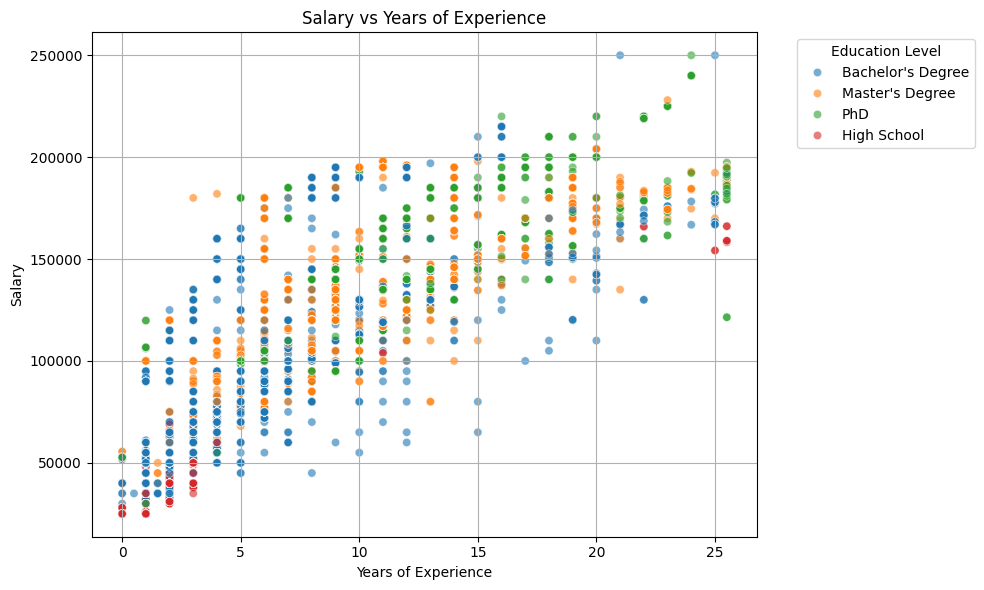

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary_df_cleaned, x='experience_years', y='salary', hue='education_level', alpha=0.6)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


### 📊 Analysis: Relationship Between Years of Experience and Salary

- The scatter plot indicates a **positive linear relationship** between years of experience and salary — salary tends to increase as experience increases.
- The **most noticeable upward trend** appears in the **0 to 10 years** experience range, suggesting early career growth is more rapid. Beyond 10 years, the **growth rate slows slightly**, indicating a possible **salary saturation**, though the upward trend continues.
- **Outliers are present**. For example:
  - Some individuals with **PhD degrees and very low experience (0–1 years)** still have **low salaries**, likely reflecting entry-level academic or research roles.
  - Individuals with only a **High School education but 20+ years of experience** are observed with **higher salaries**, which may reflect senior positions gained through experience rather than formal education.
- **Education level appears to influence salary** within similar experience levels, as seen from the hue in the plot.

> 📌 Overall, the relationship between experience and salary aligns with expectations, showing **steady growth** with **a few anomalies**, highlighting that **both experience and education** contribute to salary outcomes.


### 4.4.4. Job Title V/S Salary

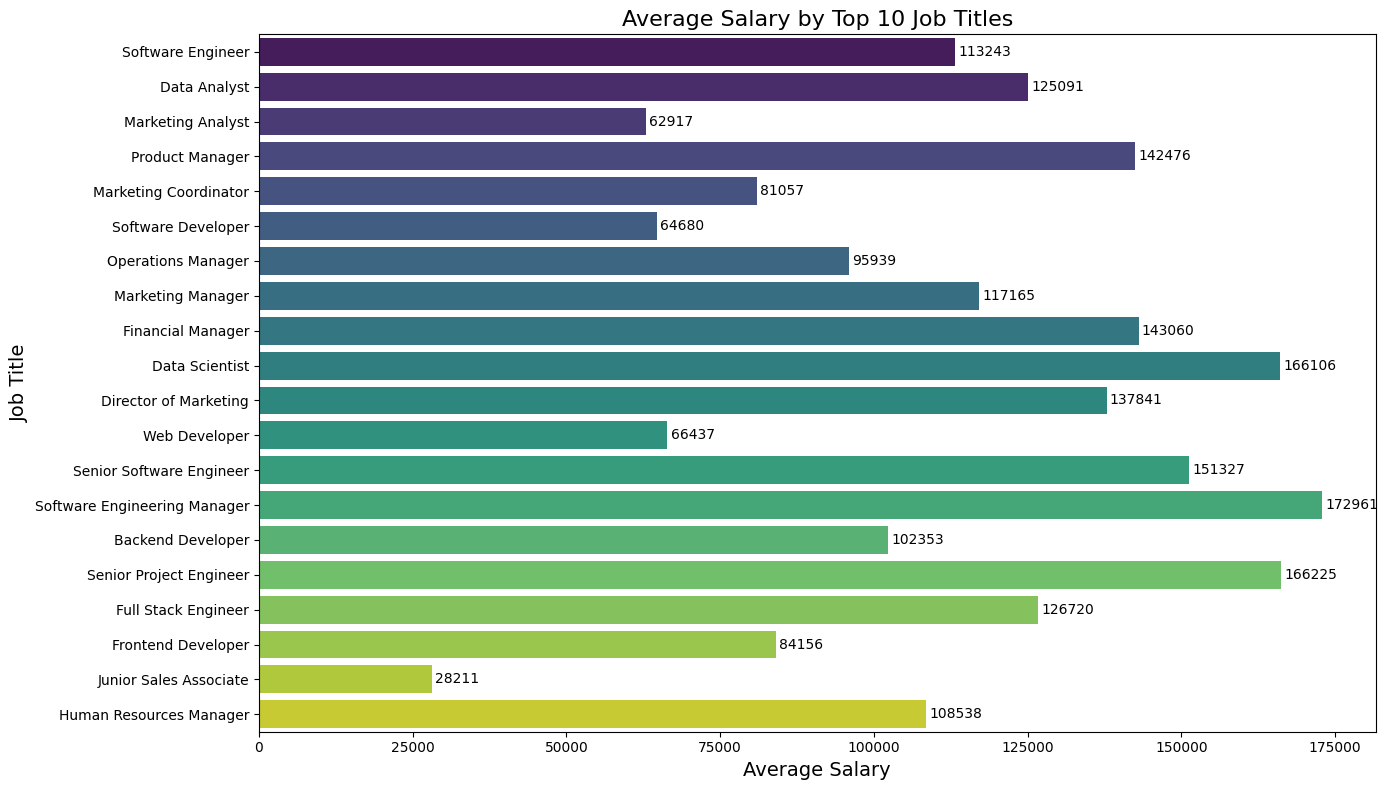

In [175]:
# Get top 10 most frequent job titles
top_jobs = salary_df_cleaned['job_title'].value_counts().head(20).index

# Filter the dataset to only top 10 job titles
top_jobs_df = salary_df_cleaned[salary_df_cleaned['job_title'].isin(top_jobs)]

# Create the barplot
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top_jobs_df,
    y='job_title',
    x='salary',
    estimator='mean',
    ci=None,
    palette='viridis'
)

# Add salary labels on each bar
for bar in ax.patches:
    salary = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(salary + 500, y_pos, f'{salary:.0f}', va='center')

# Set titles and labels
plt.title('Average Salary by Top 10 Job Titles', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Job Title', fontsize=14)
plt.tight_layout()
plt.show()

### 📊 Job Title vs Average Salary – Summary

#### 🔝 Top 5 Highest-Paying Roles:
- **Software Engineer Manager**: 172,502  
- **Senior Project Engineer**: 166,225  
- **Data Scientist**: 166,106  
- **Senior Software Engineer**: 151,327  
- **Product Manager**: 142,476  

These roles are highly paid due to their technical expertise and leadership responsibilities.

#### 🔻 Bottom 5 Lowest-Paying Roles:
- **Junior Sales Associate**: 28,211  
- **Marketing Analyst**: 62,917  
- **Software Developer**: 64,680  
- **Web Developer**: 66,437  
- **Marketing Coordinator**: 81,057  

Lower averages suggest these roles may require less experience or involve non-leadership responsibilities.

#### 💡 Key Insights:
- **Managerial and senior technical roles** earn the highest salaries.
- **Leadership and specialization** (e.g., Data Science) significantly impact salary.
- **Marketing roles** generally earn less than technical roles, even in managerial positions.


## 4.5. Feature Engineering and Modeling

In [176]:
salary_df_encoded = salary_df_cleaned.copy()

### 4.5.1. Feature Engineering

In [177]:
#function to extract seniority
def extract_seniority(title):
    title = title.lower()
    if 'senior' in title:
        return 'Senior'
    elif 'director' in title:
        return 'Director'
    elif 'manager' in title:
        return 'Manager'
    elif 'junior' in title:
        return 'Junior'
    else:
        return 'Mid'

In [178]:
#function to extrach job field
def extract_category(title):
    title = title.lower()
    if 'data' in title:
        return 'Data'
    elif 'research' in title:
        return 'Research'
    elif 'software' in title or 'developer' in title or 'engineer' in title:
        return 'Software'
    elif 'market' in title:
        return 'Marketing'
    elif 'manager' in title:
        return 'Management'
    else:
        return 'Other'

In [179]:
#apply transfomations
salary_df_encoded['seniority_level'] = salary_df_encoded['job_title'].apply(extract_seniority)
salary_df_encoded['job_category'] = salary_df_encoded['job_title'].apply(extract_category)

In [180]:
rearranged_cols = salary_df_encoded.columns.tolist()

# Remove the columns you want to move
rearranged_cols.remove('job_category')
rearranged_cols.remove('seniority_level')

# Find the index of the target column
insert_at = rearranged_cols.index('job_title') + 1

# Insert the columns at the right spot
rearranged_cols[insert_at:insert_at] = ['job_category', 'seniority_level']

# Reorder the DataFrame
salary_df_encoded = salary_df_encoded[rearranged_cols]

In [181]:
salary_df_encoded.head(10)

,age,Gender,education_level,job_title,job_category,seniority_level,experience_years,salary
0,32.0,Male,Bachelor's Degree,Software Engineer,Software,Mid,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,Data,Mid,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,Management,Senior,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,Other,Mid,7.0,60000.0
4,52.0,Male,Master's Degree,Director,Other,Director,20.0,200000.0
5,29.0,Male,Bachelor's Degree,Marketing Analyst,Marketing,Mid,2.0,55000.0
6,42.0,Female,Master's Degree,Product Manager,Management,Manager,12.0,120000.0
7,31.0,Male,Bachelor's Degree,Sales Manager,Management,Manager,4.0,80000.0
8,26.0,Female,Bachelor's Degree,Marketing Coordinator,Marketing,Mid,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,Other,Senior,10.0,110000.0


### 4.5.2 Feature Encoding

In [182]:
# Encoding education_level
education_order = ['High School', "Bachelor's Degree", "Master's Degree", 'PhD']
salary_df_encoded['education_encoded'] = salary_df_encoded['education_level'].map({level: i for i, level in enumerate(education_order)})

# Encoding seniority_level
seniority_order = ['Junior', 'Mid', 'Senior', 'Manager', 'Director']
salary_df_encoded['seniority_encoded'] = salary_df_encoded['seniority_level'].map({level: i for i, level in enumerate(seniority_order)})

In [183]:
salary_df_encoded = pd.get_dummies(salary_df_encoded, columns=['Gender', 'job_category'], drop_first=True)

In [184]:
salary_df_encoded.head(10)

,age,education_level,job_title,seniority_level,experience_years,salary,education_encoded,seniority_encoded,Gender_Male,Gender_Other,job_category_Management,job_category_Marketing,job_category_Other,job_category_Research,job_category_Software
0,32.0,Bachelor's Degree,Software Engineer,Mid,5.0,90000.0,1,1,True,False,False,False,False,False,True
1,28.0,Master's Degree,Data Analyst,Mid,3.0,65000.0,2,1,False,False,False,False,False,False,False
2,45.0,PhD,Senior Manager,Senior,15.0,150000.0,3,2,True,False,True,False,False,False,False
3,36.0,Bachelor's Degree,Sales Associate,Mid,7.0,60000.0,1,1,False,False,False,False,True,False,False
4,52.0,Master's Degree,Director,Director,20.0,200000.0,2,4,True,False,False,False,True,False,False
5,29.0,Bachelor's Degree,Marketing Analyst,Mid,2.0,55000.0,1,1,True,False,False,True,False,False,False
6,42.0,Master's Degree,Product Manager,Manager,12.0,120000.0,2,3,False,False,True,False,False,False,False
7,31.0,Bachelor's Degree,Sales Manager,Manager,4.0,80000.0,1,3,True,False,True,False,False,False,False
8,26.0,Bachelor's Degree,Marketing Coordinator,Mid,1.0,45000.0,1,1,False,False,False,True,False,False,False
9,38.0,PhD,Senior Scientist,Senior,10.0,110000.0,3,2,True,False,False,False,True,False,False


### 4.5.2. Correlation Analysis

#### Converting boolean into integer

In [185]:
#converting boolean values into integer
salary_df_encoded = salary_df_encoded.astype({col: int for col in salary_df_encoded.select_dtypes(bool).columns})

In [186]:
salary_df_encoded.head()

,age,education_level,job_title,seniority_level,experience_years,salary,education_encoded,seniority_encoded,Gender_Male,Gender_Other,job_category_Management,job_category_Marketing,job_category_Other,job_category_Research,job_category_Software
0,32.0,Bachelor's Degree,Software Engineer,Mid,5.0,90000.0,1,1,1,0,0,0,0,0,1
1,28.0,Master's Degree,Data Analyst,Mid,3.0,65000.0,2,1,0,0,0,0,0,0,0
2,45.0,PhD,Senior Manager,Senior,15.0,150000.0,3,2,1,0,1,0,0,0,0
3,36.0,Bachelor's Degree,Sales Associate,Mid,7.0,60000.0,1,1,0,0,0,0,1,0,0
4,52.0,Master's Degree,Director,Director,20.0,200000.0,2,4,1,0,0,0,1,0,0


#### Selecting relevant columns for correlation

In [187]:
corr_df = salary_df_encoded.select_dtypes(include=['int64', 'float64'])

In [188]:
corr_df.head()

,age,experience_years,salary,education_encoded,seniority_encoded,Gender_Male,Gender_Other,job_category_Management,job_category_Marketing,job_category_Other,job_category_Research,job_category_Software
0,32.0,5.0,90000.0,1,1,1,0,0,0,0,0,1
1,28.0,3.0,65000.0,2,1,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,3,2,1,0,1,0,0,0,0
3,36.0,7.0,60000.0,1,1,0,0,0,0,1,0,0
4,52.0,20.0,200000.0,2,4,1,0,0,0,1,0,0


#### Compute Correlation Matrix

In [189]:
corr_matrix = corr_df.corr()

In [190]:
corr_matrix

,age,experience_years,salary,education_encoded,seniority_encoded,Gender_Male,Gender_Other,job_category_Management,job_category_Marketing,job_category_Other,job_category_Research,job_category_Software
age,1.000000,0.943309,0.731908,0.592460,0.450807,0.115103,0.034874,0.029876,0.017902,-0.189910,0.041647,0.087909
experience_years,0.943309,1.000000,0.818876,0.612056,0.482445,0.100500,0.050947,0.044873,0.016389,-0.256245,0.101273,0.062349
salary,0.731908,0.818876,1.000000,0.643751,0.438107,0.126654,0.009092,0.054714,-0.078971,-0.419382,0.135570,0.091768
education_encoded,0.592460,0.612056,0.643751,1.000000,0.390452,0.025679,-0.069223,-0.098754,0.011563,-0.302643,0.269737,0.021394
seniority_encoded,0.450807,0.482445,0.438107,0.390452,1.000000,0.043467,-0.013001,0.406818,0.251717,-0.190359,0.103367,-0.219688
Gender_Male,0.115103,0.100500,0.126654,0.025679,0.043467,1.000000,-0.050418,-0.001651,-0.153341,-0.033875,-0.031030,0.103566
Gender_Other,0.034874,0.050947,0.009092,-0.069223,-0.013001,-0.050418,1.000000,-0.017694,-0.019185,-0.019230,-0.007951,0.056465
job_category_Management,0.029876,0.044873,0.054714,-0.098754,0.406818,-0.001651,-0.017694,1.000000,-0.161972,-0.162353,-0.067125,-0.313361
job_category_Marketing,0.017902,0.016389,-0.078971,0.011563,0.251717,-0.153341,-0.019185,-0.161972,1.000000,-0.176036,-0.072783,-0.339771
job_category_Other,-0.189910,-0.256245,-0.419382,-0.302643,-0.190359,-0.033875,-0.019230,-0.162353,-0.176036,1.000000,-0.072954,-0.340570


#### Visualizing the correlation matrix using heatmap

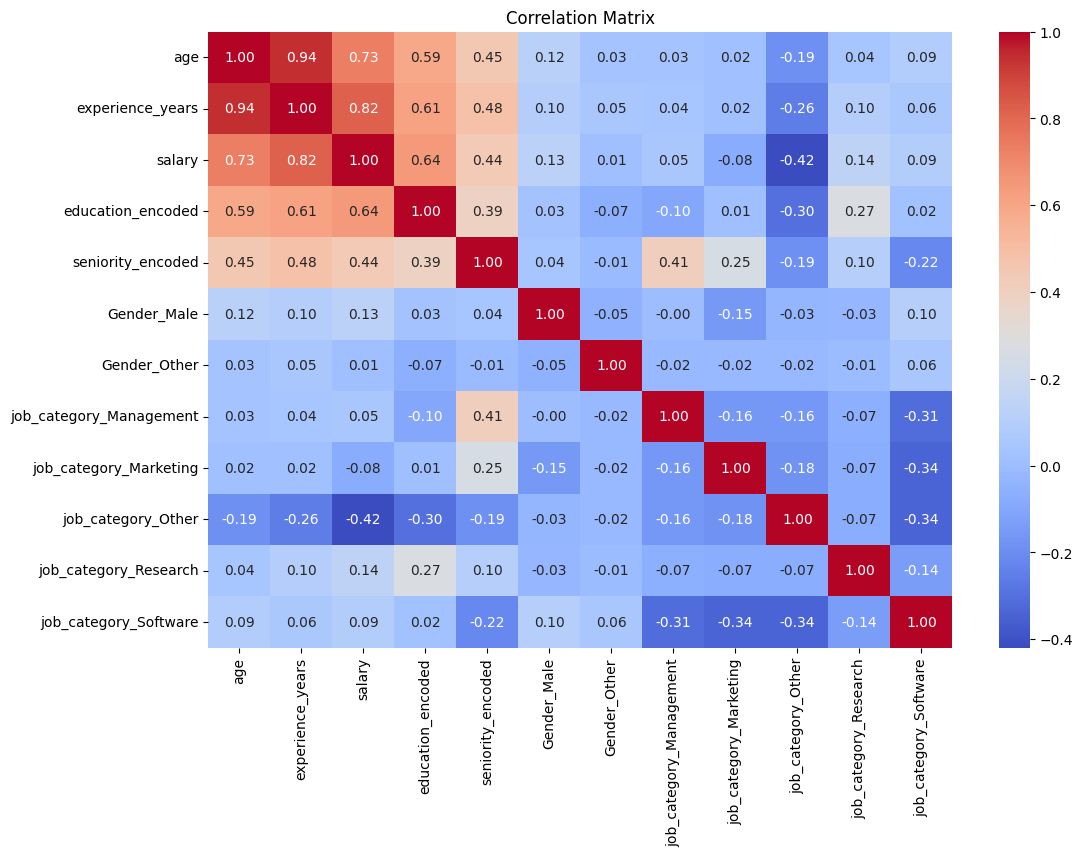

In [191]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Correlation with Salary

In [192]:
salary_corr = corr_matrix['salary'].sort_values(ascending=True)

In [193]:
salary_corr_df = salary_corr.to_frame()

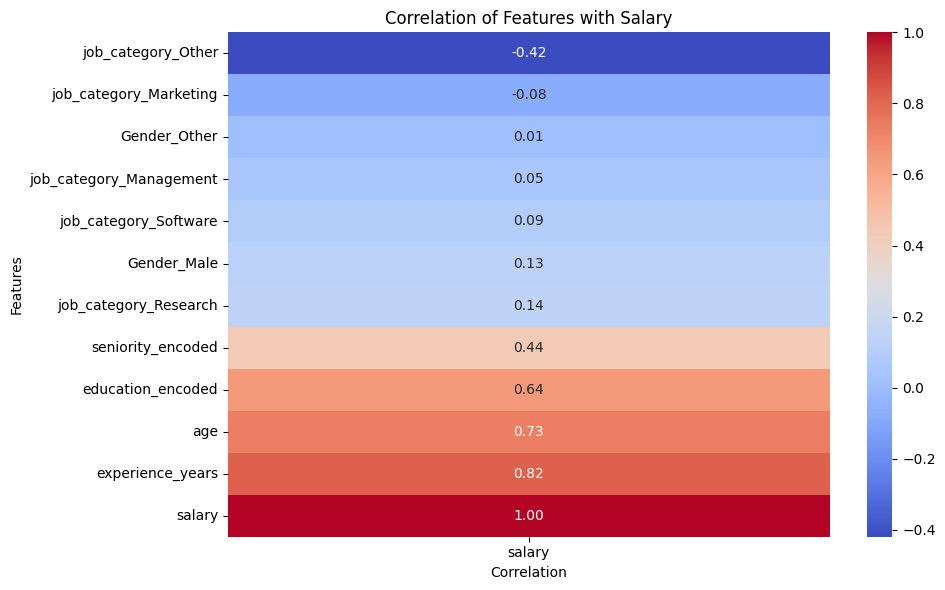

In [194]:
plt.figure(figsize=(10, len(salary_corr) * 0.5))  # Dynamic height based on number of features
sns.heatmap(salary_corr_df, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")

plt.title("Correlation of Features with Salary")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## 📊 Correlation Analysis: Features vs Salary

This heatmap displays the correlation between different features and **salary**.  
Correlation values range from **-1** (strong negative) to **+1** (strong positive).

---

### 🔝 Top Positively Correlated Features

| Feature              | Correlation |
|----------------------|-------------|
| `experience_years`   | **0.82** ✅ |
| `age`                | 0.73        |
| `education_encoded`  | 0.64        |
| `seniority_encoded`  | 0.44        |

> These features strongly influence salary.  
> More **experience**, **age**, **education**, and **seniority** generally mean **higher salary**.

---

### 🔍 Weak or Minimal Correlation

| Feature                   | Correlation |
|---------------------------|-------------|
| `job_category_Research`   | 0.14        |
| `Gender_Male`             | 0.13        |
| `job_category_Software`   | 0.09        |
| `job_category_Management` | 0.06        |
| `Gender_Other`            | 0.01        |

> These features have **weak positive** or **near-zero** correlation.  
> Gender and most job categories **do not** have a strong impact on salary in this dataset.

---

### 🚩 Negatively Correlated Features

| Feature                  | Correlation  |
|--------------------------|--------------|
| `job_category_Marketing` | -0.08        |
| `job_category_Other`     | **-0.42** ❗  |

> "Other" job category shows a **strong negative** correlation with salary.  
> Individuals in this group tend to earn **significantly less**.

---

### ✅ Summary

- **Most influential features**: `experience_years`, `age`, `education_encoded`, `seniority_encoded`.
- **Weakly influencing features**: gender and most job categories.
- **Potential red flag**: `job_category_Other` has a strong negative impact on salary.

### 4.5.3. Feature Selection

**Based on the correlation analysis.** <br>
**The final features are:**
- `experience_years`
- `age`
- `education_encoded`
- `seniority_encoded`

In [195]:
# Select final predictor columns based on correlation and domain knowledge
predictors = ['experience_years', 'age', 'education_encoded', 'seniority_encoded']

# Create a new DataFrame for modeling
salary_df_model = salary_df_encoded[predictors + ['salary']].copy()

In [196]:
salary_df_model.head()

,experience_years,age,education_encoded,seniority_encoded,salary
0,5.0,32.0,1,1,90000.0
1,3.0,28.0,2,1,65000.0
2,15.0,45.0,3,2,150000.0
3,7.0,36.0,1,1,60000.0
4,20.0,52.0,2,4,200000.0


### 4.5.4. Predictor and Target Variable Selection

In [197]:
X = salary_df_model[['experience_years', 'age', 'education_encoded', 'seniority_encoded']]
y = salary_df_model[['salary']]

### 4.5.4. Train Test Split

In [198]:
#importing necessary machine learning modules and submodules

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training Data : {X_train.shape}')
print(f'Testing Data: {X_test.shape}')

Training Data : (5355, 4)
Testing Data: (1339, 4)


### 4.5.5. Feature Scaling

In [200]:
from sklearn.preprocessing import RobustScaler

In [201]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.5.5. Model Training (Linear Regression)

In [202]:
model = RandomForestRegressor()

In [203]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

### 4.5.6. Make Prediction

In [204]:
y_pred = model.predict(X_test_scaled)

### 4.5.7. Model Evaulation

In [205]:
#importing model evaluation modules
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [206]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

Model Evaluation Metrics:
MAE  : 7247.88
MSE  : 177698340.74
RMSE : 13330.35
R²   : 0.93


In [207]:
model_train_score = model.score(X_train_scaled, y_train) 
y_pred = model.predict(X_test_scaled)
model_test_r2_score = r2_score(y_test, y_pred)

print(f'Train Score: {model_train_score}\nTest Score: {model_test_r2_score}')

Train Score: 0.9500595400209115
Test Score: 0.9349438190707839


### 4.5.8 Saving the Model and Scaler

In [208]:
import joblib

In [209]:
# Save the trained model
joblib.dump(model, '../models/predictor_model.pkl')

# Save the scaler
joblib.dump(scaler, '../models/input_scaler.pkl')

['../models/input_scaler.pkl']